# Dota 2 BDA SS 2017

## Projektmitglieder

#### Degfar, Vitali, 4. Semester – 191904 
#### Grünther, Adrian, 4. Semester – 191908
#### Holzwarth, Robin, 6. Semester – 188569
#### Maul, Yvonne, 4. Semester – 191914
#### Sudahl, Maren, 5. Semester – 190517

## Kurzbeschreibung Datensatz

#### ca. 434 MB (zipped)
#### 18 csv Files 
#### 16 verbunden Tabellen zu 50.000 Spielen 
##### 2 verbundene Tabellen zu 900.000 Spielausgängen

## Allgemeine Vorbereitungen

### Laden der Bibliotheken

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Definition Funktionen

In [10]:
def ccc(crosstab):
    chi2 = stats.chi2_contingency(crosstab)[0]
    q = min(crosstab.shape)
    if q > 1:
        return np.sqrt(chi2 / (chi2 + crosstab.values.sum())) * np.sqrt(q / (q-1))
    else:
        return 0

### Laden der Daten

In [11]:
df_player = pd.read_csv('data/players.csv', memory_map=True)
df_match = pd.read_csv('data/match.csv', memory_map=True)
df_chat = pd.read_csv("data/chat.csv", memory_map=True)
df_hero_names = pd.read_csv('data/hero_names.csv', memory_map=True)

### Cleanup Daten

In [12]:
df_chat.drop([
    'unit',
    'time',],
    axis=1,
    inplace=True)

In [13]:
df_match.drop([
    'start_time',
    'tower_status_radiant',
    'tower_status_dire',
    'barracks_status_radiant',
    'barracks_status_dire',
    'first_blood_time',
    'game_mode',
    'negative_votes',
    'positive_votes',
    'cluster'],
    axis=1,
    inplace=True)

In [14]:
df_player.drop([
    'account_id',
    'gold_per_min',
    'xp_per_min',
    'denies',
    'last_hits',
    'stuns',
    'hero_damage',
    'hero_healing',
    'tower_damage',
    'item_0',
    'item_1',
    'item_2',
    'item_3',
    'item_4',
    'item_5',
    'level',
    'leaver_status',
    'xp_hero',
    'xp_creep',
    'xp_roshan',
    'xp_other',
    'gold_other',
    'gold_death',
    'gold_buyback',
    'gold_abandon',
    'gold_sell',
    'gold_destroying_structure',
    'gold_killing_heros',
    'gold_killing_creeps',
    'gold_killing_roshan',
    'gold_killing_couriers',
    'unit_order_none',
    'unit_order_move_to_position',
    'unit_order_move_to_target',
    'unit_order_attack_move',
    'unit_order_attack_target',
    'unit_order_cast_position',
    'unit_order_cast_target',
    'unit_order_cast_target_tree',
    'unit_order_cast_no_target',
    'unit_order_cast_toggle',
    'unit_order_hold_position',
    'unit_order_train_ability',
    'unit_order_drop_item',
    'unit_order_give_item',
    'unit_order_pickup_item',
    'unit_order_pickup_rune',
    'unit_order_purchase_item',
    'unit_order_sell_item',
    'unit_order_disassemble_item',
    'unit_order_move_item',
    'unit_order_cast_toggle_auto',
    'unit_order_stop',
    'unit_order_taunt',
    'unit_order_buyback',
    'unit_order_glyph',
    'unit_order_eject_item_from_stash',
    'unit_order_cast_rune',
    'unit_order_ping_ability',
    'unit_order_move_to_direction',
    'unit_order_patrol',
    'unit_order_vector_target_position',
    'unit_order_radar',
    'unit_order_set_item_combine_lock',
    'unit_order_continue'], axis=1, inplace=True)

## Überprüfen auf fehlenden Werte

### Match

In [15]:
print ("NA Werte \t" +  str(df_match.isnull().sum()))


NA Werte 	match_id       0
duration       0
radiant_win    0
dtype: int64


### Player

In [109]:
print ("NA Werte \t" +  str(df_player.isnull().sum()))

NA Werte 	match_id       0
hero_id        0
player_slot    0
gold           0
gold_spent     0
kills          0
deaths         0
assists        0
dtype: int64


** Keine fehlende Werte **

### Chat

In [17]:
print ("NA Werte \t" +  str(df_chat.isnull().sum()))

NA Werte 	match_id     0
key         11
slot         1
dtype: int64


### Hero Names

In [18]:
print ("NA Werte \t" +  str(df_hero_names.isnull().sum()))

NA Werte 	name              0
hero_id           0
localized_name    0
dtype: int64


## Datenstruktur

### Matches

In [116]:
df_match.head(2)

,match_id,duration,radiant_win
0,0,2375,True
1,1,2582,False


In [20]:
df_match.describe()

,match_id,duration
count,50000.000000,50000.000000
mean,24999.500000,2476.453500
std,14433.901067,634.631261
min,0.000000,59.000000
25%,12499.750000,2029.000000
50%,24999.500000,2415.000000
75%,37499.250000,2872.000000
max,49999.000000,16037.000000


### Spieler

In [21]:
df_player.head()

,match_id,hero_id,player_slot,gold,gold_spent,kills,deaths,assists
0,0,86,0,3261,10960,9,3,18
1,0,51,1,2954,17760,13,3,18
2,0,83,2,110,12195,0,4,15
3,0,11,3,1179,22505,8,4,19
4,0,67,4,3307,23825,20,3,17


In [22]:
df_player.describe()

,match_id,hero_id,player_slot,gold,gold_spent,kills,deaths,assists
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,24999.500000,50.551456,66.000000,1888.516638,14110.043850,7.404500,7.680752,11.761900
std,14433.771161,32.809123,64.015687,1742.949262,6401.868898,5.437802,3.808092,6.393375
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12499.750000,21.000000,2.000000,586.000000,9590.000000,3.000000,5.000000,7.000000
50%,24999.500000,47.000000,66.000000,1350.000000,13110.000000,6.000000,8.000000,11.000000
75%,37499.250000,75.000000,130.000000,2742.000000,17635.000000,10.000000,10.000000,16.000000
max,49999.000000,112.000000,132.000000,46424.000000,200000.000000,59.000000,42.000000,54.000000


### Chat

In [23]:
df_chat.head()

,match_id,key,slot
0,0,force it,6.0
1,0,space created,1.0
2,0,hah,1.0
3,0,ez 500,6.0
4,0,mvp ulti,4.0


In [24]:
df_chat.describe()

,match_id,slot
count,1.285417e+06,1.285416e+06
mean,2.226965e+04,4.494922e+00
std,1.303931e+04,2.878164e+00
min,0.000000e+00,-9.000000e+00
25%,1.081200e+04,2.000000e+00
50%,2.232200e+04,5.000000e+00
75%,3.380000e+04,7.000000e+00
max,4.461800e+04,9.000000e+00


## Überprüfung auf Ausreiser

### Player

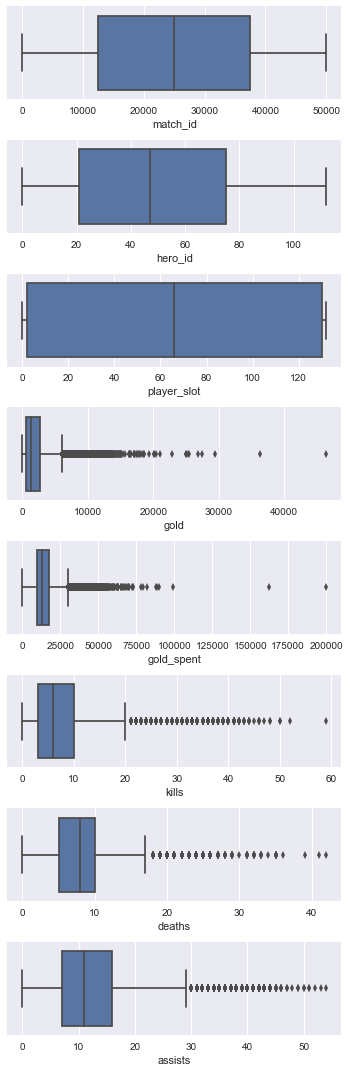

In [112]:
cols = df_player.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(5, 15))

for i in range(len(cols)):
    sns.boxplot(x=cols[i], orient='h', data=df_player, ax=axes[i])

fig.tight_layout()

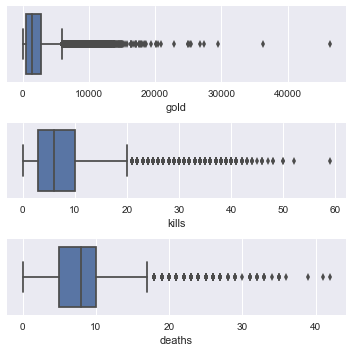

In [114]:
cols = df_player[['gold','kills','deaths']].select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(5, 5))
for i in range(len(cols)):
    sns.boxplot(x=cols[i], orient='h', data=df_player, ax=axes[i])
fig.tight_layout()

### Matches

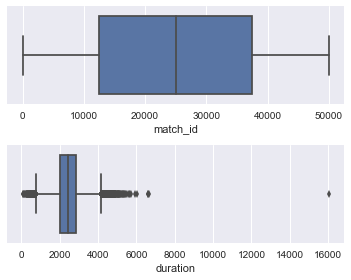

In [117]:
# Ausreiser mit Hilfe von Boxplots in df_match visualisieren
cols = df_match.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(5, 4))
for i in range(len(cols)):
    sns.boxplot(x=cols[i], orient='h', data=df_match, ax=axes[i])
fig.tight_layout()

** Begründung: ** 
Die Ausreißer in Matches werden nicht entfernt, da dann Spieler eventuell nicht mehr zugeordnet werden können. Auch ändert sich die Länge der beiden Dataframes.

## Gibt es Helden die erfolgreicher sind als andere?

In [29]:
# Lokale Variablen
match = df_match.copy()
player = df_player.copy()
hero_names = df_hero_names.copy()

In [30]:
# Datentypen der Spalten von df_match
# hier kann man erkennen, dass die Spalte radiant_win einen boolischen Wert hat
match.dtypes

match_id       int64
duration       int64
radiant_win     bool
dtype: object

In [31]:
# Anzahl Zeilen und Spalten von df_match
match.shape

(50000, 3)

In [32]:
# Anzahl Zeilen und Spalten von df_player
player.shape

(500000, 8)

In [33]:
# Aus boolischen Werten Spalte "radiant_win" in int umwandeln
match["radiant_win"] = match.radiant_win.astype(int)

In [34]:
match["radiant_win"].head()

0    1
1    0
2    0
3    0
4    1
Name: radiant_win, dtype: int32

In [35]:
# beide Datensätze verbinduen mit Hilfe von match_id und Betrahtung nur von Teammitglieder mit player_slot 0-4
mat = match.merge(player[player["player_slot"]<6],on='match_id')

#### Merge von Matches und Player (nur ein Team) 

In [118]:
print(mat.head())

   match_id  duration  radiant_win  hero_id  player_slot  gold  gold_spent  \
0         0      2375            1       86            0  3261       10960   
1         0      2375            1       51            1  2954       17760   
2         0      2375            1       83            2   110       12195   
3         0      2375            1       11            3  1179       22505   
4         0      2375            1       67            4  3307       23825   

   kills  deaths  assists  
0      9       3       18  
1     13       3       18  
2      0       4       15  
3      8       4       19  
4     20       3       17  


In [119]:
mat.shape

(250000, 10)

In [38]:
# mat.groupby('hero_id').mean()['radiant_win_x']
df_gb_heroID = pd.DataFrame(mat.groupby('hero_id').mean()['radiant_win'], index=np.arange(113))
df_gb_heroID.columns =["winrate"]
df_gb_heroID["hero_id"] = np.arange(1,114)

In [120]:
df_gb_heroID.head()

,winrate,hero_id
0,0.136364,1
1,0.484149,2
2,0.454823,3
3,0.487500,4
4,0.469646,5


### Winrates der Champion

In [40]:
hero_names = hero_names.merge(df_gb_heroID, left_on='hero_id', right_on='hero_id', how='outer')
hero_names.head()

,name,hero_id,localized_name,winrate
0,npc_dota_hero_antimage,1,Anti-Mage,0.136364
1,npc_dota_hero_axe,2,Axe,0.484149
2,npc_dota_hero_bane,3,Bane,0.454823
3,npc_dota_hero_bloodseeker,4,Bloodseeker,0.487500
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden,0.469646


In [128]:
hero_names[['total_plays','localized_name','winrate', 'winrate_kurz','winrate_mittel','winrate_lang']].sort_values("winrate", ascending=False).head()

,total_plays,localized_name,winrate,winrate_kurz,winrate_mittel,winrate_lang
69,1291.0,Enchantress,0.608492,0.650334,0.591820,0.568720
108,270.0,Ancient Apparition,0.606761,0.555180,0.618478,0.639836
59,1514.0,Elder Titan,0.599644,0.690141,0.568287,0.503937
55,1581.0,Death Prophet,0.597286,0.671494,0.576730,0.503333
40,2169.0,Rubick,0.592802,0.702041,0.549370,0.511719


### Verteilung Championwinrates 

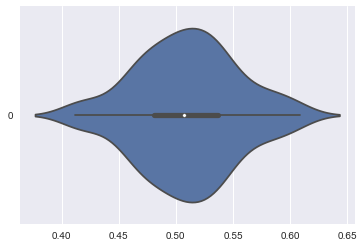

In [132]:
sns.violinplot(data=hero_names.winrate, orient="h");

## Playrate von Champions



In [43]:
hero_names = mat.hero_id.value_counts().to_frame(name="total_plays").merge(hero_names,left_index=True, right_index=True)


#### Regplot der Verteilung Winrate zu Anzahl gespielt

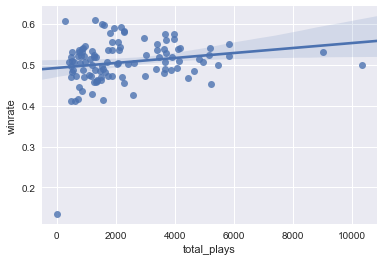

In [44]:
sns.regplot(data=hero_names, y="winrate", x="total_plays")

In [45]:
# Entfernen des Ausreisers
hero_names.drop(hero_names.winrate<0.14, inplace=True)

#### Bereinigter Regplot der Verteilung Winrate zu Anzahl gespielt

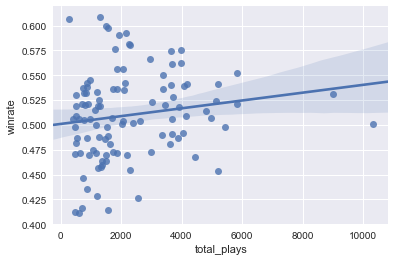

In [46]:
 sns.regplot(data=hero_names, y="winrate", x="total_plays")

#### Korrelation Helden zu Winrate

In [47]:
hero_names.corr()

,total_plays,hero_id,winrate
total_plays,1.000000,-0.246683,0.157869
hero_id,-0.246683,1.000000,-0.013915
winrate,0.157869,-0.013915,1.000000


## Ist die Winrate der Champions abhängig von der Spieldauer?

In [48]:
mat.shape

(250000, 10)

In [49]:
# df_mph nach 'duration_x' aufsteigend sortiert
df_mat_sort = mat.sort_values(by='duration')
df_mat_sort.head()

,match_id,duration,radiant_win,hero_id,player_slot,gold,gold_spent,kills,deaths,assists
157194,31438,59,0,107,4,670,620,0,0,0
157190,31438,59,0,82,0,1,1350,0,0,0
157191,31438,59,0,28,1,1,610,0,0,0
157192,31438,59,0,11,2,1,585,0,1,0
157193,31438,59,0,105,3,1,695,0,1,0


In [50]:
df_mat_sort.shape

(250000, 10)

In [51]:
# sortierte df nach Dauer nur mit Spalte Dauer beschreiben, um Klassengrößen festzulegen 
df_mat_sort["duration"].describe()

count    250000.000000
mean       2476.453500
std         634.626184
min          59.000000
25%        2029.000000
50%        2415.000000
75%        2872.000000
max       16037.000000
Name: duration, dtype: float64

In [52]:
# Spalte mit Klassen für die Dauer erstellen
df_mat_sort_bins = df_mat_sort['duration'].quantile(q=[x/10 for x in range (11)])
df_mat_sort_bins = [x*300 for x in range(57)]
df_mat_sort_bins_label = [x*5 for x in range(1,57)]
df_mat_sort["bins"] = pd.cut(df_mat_sort['duration'], bins=df_mat_sort_bins, labels=df_mat_sort_bins_label)

In [53]:
df_mat_sort_bins[:5]
df_mat_sort.head()

,match_id,duration,radiant_win,hero_id,player_slot,gold,gold_spent,kills,deaths,assists,bins
157194,31438,59,0,107,4,670,620,0,0,0,5
157190,31438,59,0,82,0,1,1350,0,0,0,5
157191,31438,59,0,28,1,1,610,0,0,0,5
157192,31438,59,0,11,2,1,585,0,1,0,5
157193,31438,59,0,105,3,1,695,0,1,0,5


In [54]:
df_mat_sort.shape

(250000, 11)

In [55]:
table = df_mat_sort['bins'].value_counts()
table.head()

40    49100
45    44740
35    40735
50    34465
30    23525
Name: bins, dtype: int64

#### Verteilung der Spiellänge über alle Spiele

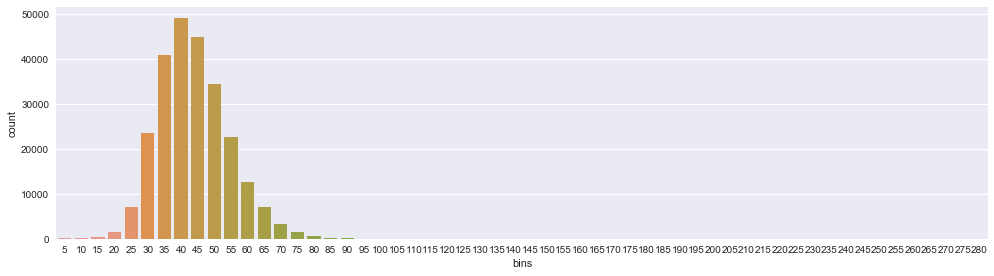

In [56]:
# Häufigkeitsverteilung der Klassen
plt.figure(figsize=(16.69, 4.27))
sns.countplot(x='bins', data=df_mat_sort);

In [57]:
df_mat_sort.shape

(250000, 11)

In [58]:
# datentyp category von Spalte "klassen" in int umwandeln
df_mat_sort["bins"] = df_mat_sort.bins.astype(int)

In [59]:
# DataFram mit 3 Klassen für die Dauer erstellen
df_mat_sort["klassen"] = pd.DataFrame({'klassen': pd.cut(df_mat_sort['bins'], bins=[0,35,50,280], labels=["kurz", "mittel", "lang"])})

#### Verteilung in kurze/mittel/lange Spiele

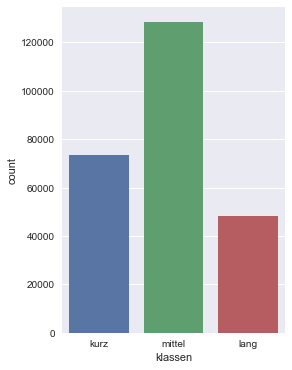

In [137]:
plt.figure(figsize=(4, 6))
sns.countplot(x='klassen', data=df_mat_sort);

** Klassen ** 

kurz: bis 35 Minuten; mittel bis 50 Minuten; lang ab 50 Minuten

In [61]:
df_kurz = pd.DataFrame(df_mat_sort[df_mat_sort.klassen == "kurz"].groupby('hero_id').mean()['radiant_win'], index=np.arange(113))
df_kurz.columns =["winrate_kurz"]
df_kurz["hero_id"] = np.arange(1,114)


In [62]:
df_mittel = pd.DataFrame(df_mat_sort[df_mat_sort.klassen == "mittel"].groupby('hero_id').mean()['radiant_win'], index=np.arange(113))
df_mittel.columns =["winrate_mittel"]
df_mittel["hero_id"] = np.arange(1,114)

In [63]:
df_lang = pd.DataFrame(df_mat_sort[df_mat_sort.klassen == "lang"].groupby('hero_id').mean()['radiant_win'], index=np.arange(113))
df_lang.columns =["winrate_lang"]
df_lang["hero_id"] = np.arange(1,114)

In [64]:
hero_names = hero_names.merge(df_kurz, left_on='hero_id', right_on='hero_id', how='outer')
hero_names = hero_names.merge(df_mittel, left_on='hero_id', right_on='hero_id', how='outer')
hero_names = hero_names.merge(df_lang, left_on='hero_id', right_on='hero_id', how='outer')

In [65]:
hero_names.drop([109, 110, 111, 112], inplace=True)

# Bereinigung auf Grund der Tatsache, dass mehr Hero IDs in matches als in hero_names

In [196]:
df_most_played_heros = hero_names.sort_values(by="total_plays", ascending=False).head(10).sort_values(by="winrate", ascending=False)

### Winrate der 10 meistgespielten Champions

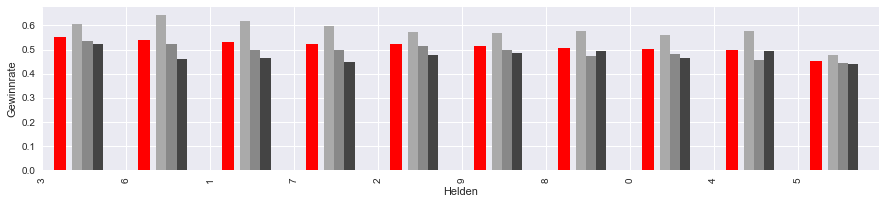

In [205]:
fig = plt.figure(figsize=(15, 3)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2,ax3,ax4 = ax,ax,ax; width = 0.12
df_most_played_heros.winrate.plot(kind='bar', color='red', ax=ax, width=width*1.2, position=-1)
df_most_played_heros.winrate_kurz.plot(kind='bar', color='#aaaaaa', ax=ax2, width=width, position=-3)
df_most_played_heros.winrate_mittel.plot(kind='bar', color='#888888', ax=ax3, width=width, position=-4)
df_most_played_heros.winrate_lang.plot(kind='bar', color='#444444', ax=ax4, width=width, position=-5)
ax.set_ylabel('Gewinnrate'); ax.set_xlabel('Helden')

** Interpretation: **
Die meistgespielten Champions sind alle stärker in kurzen Spielen. Es scheint eine allgemeine Priorität auf dieser Art zu liegen.

#### Heatmap Korrelation der verschiedenen Winrates

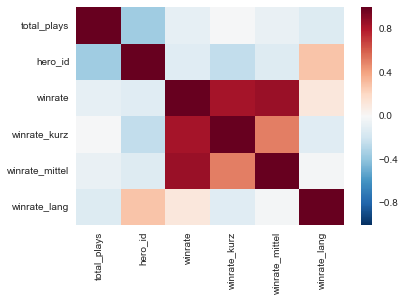

In [70]:
sns.heatmap(df_most_played_heros.corr())

#### Höchste Winrate kurze Spiele

In [204]:
df_most_played_heros[['total_plays','localized_name','winrate', 'winrate_kurz']].sort_values("winrate_kurz", ascending=False).head(3)

,total_plays,localized_name,winrate,winrate_kurz,winrate_mittel,winrate_lang
6,5190.0,Faceless Void,0.540810,0.643902,0.521333,0.461095
1,9008.0,Phantom Lancer,0.531194,0.618836,0.496798,0.466966
3,5824.0,Outworld Devourer,0.551839,0.605882,0.533654,0.522759


#### Höchste Winrate mittlere Spiele

In [202]:
df_most_played_heros[['total_plays','localized_name','winrate','winrate_mittel']].sort_values("winrate_mittel", ascending=False).head(3)

,total_plays,localized_name,winrate,winrate_kurz,winrate_mittel,winrate_lang
3,5824.0,Outworld Devourer,0.551839,0.605882,0.533654,0.522759
6,5190.0,Faceless Void,0.540810,0.643902,0.521333,0.461095
2,5838.0,Juggernaut,0.521411,0.571521,0.512989,0.479518


#### Höchste Winrate lange Spiele

In [203]:
df_most_played_heros[['total_plays','localized_name','winrate','winrate_lang']].sort_values("winrate_lang", ascending=False).head(3)

,total_plays,localized_name,winrate,winrate_kurz,winrate_mittel,winrate_lang
3,5824.0,Outworld Devourer,0.551839,0.605882,0.533654,0.522759
4,5445.0,Witch Doctor,0.498328,0.576812,0.455285,0.495763
8,4963.0,Silencer,0.507040,0.577926,0.472564,0.495719


## Einfluss der Chatnutzung auf die  Winrate der Teams 

#### Erzeugen eigener Datensätze

In [74]:
match = df_match.copy()
chat = df_chat.copy()
player = df_player.copy()

#### Edit matches Datensatz

In [75]:
# Spalten umbenennen
match.columns = ['match_id','Spieldauer','Gewinner']
# Gewinner True False durch Namen ersetzten
match['Gewinner'] = match['Gewinner'].map(lambda x: 'Radiant' if x else 'Dire')

#### Edit chat Datensatz

In [76]:
# Nachrichtenlänge für jede Nachricht
chat['NachrichtenLänge'] = chat['key'].str.len()
# Zuweisung Team abhängig vom Spieler-Slot
chat['Team'] = pd.cut(chat['slot'],[0,5,10],labels=['Radiant', 'Dire'])

#### Grouped Chat

In [77]:
groupedchat = chat[['match_id', 'Team', 'key']].groupby(['match_id', 'Team']).count()
groupedchat.columns = ['AnzahlNachrichten']
# Gesamte Nachrichtenlänge im Team in diesem Spiel
groupedchat['NachrichtenLängeGesamt'] = chat[['match_id', 'Team', 'NachrichtenLänge']].groupby(['match_id', 'Team']).sum()
groupedchat['DurchschnittlicheLänge'] = groupedchat['NachrichtenLängeGesamt']/groupedchat['AnzahlNachrichten']
groupedchat = groupedchat.reset_index()
groupedchat = groupedchat.merge(match, on='match_id')
#Erstellen Nachriten pro Minute
groupedchat['NachrichtenProMinute'] = groupedchat['AnzahlNachrichten']/ (groupedchat['Spieldauer']/60)
# Erstellen Spieldauerbereiche
groupedchat['SpieldauerBereiche'] = pd.cut(groupedchat['Spieldauer'],[x*300 for x in range(21)], labels=[(x+1)*5 for x in range(20)])
# Erstellen Zeichen pro Minute
groupedchat['ZeichenProMinute'] = groupedchat['NachrichtenLängeGesamt']/(groupedchat['Spieldauer']/60)
#Erstellen getrennter Tabellen (Win/Lose)
groupedchat_win = groupedchat[groupedchat['Team']==groupedchat['Gewinner']]
groupedchat_lose = groupedchat[groupedchat['Team']!=groupedchat['Gewinner']]

#### Grouped Chat - Ansicht

In [231]:
groupedchat.head(4).transpose()

,0,1,2,3
match_id,0,0,1,1
Team,Dire,Radiant,Dire,Radiant
AnzahlNachrichten,28,19,4,12
NachrichtenLängeGesamt,352,117,32,102
DurchschnittlicheLänge,12.5714,6.15789,8,8.5
Spieldauer,2375,2375,2582,2582
Gewinner,Radiant,Radiant,Dire,Dire
NachrichtenProMinute,0.707368,0.48,0.0929512,0.278854
SpieldauerBereiche,40,40,45,45
ZeichenProMinute,8.89263,2.95579,0.74361,2.37026


## Zusammenhang

** Zusammenhang Gewinner **

In [79]:
ccc(pd.crosstab(groupedchat_win['Team'],groupedchat_win['NachrichtenProMinute']))

0.87748362563805871

** Zusammenhang Verlierer **

In [80]:
ccc(pd.crosstab(groupedchat_lose['Team'],groupedchat_lose['NachrichtenProMinute']))

0.87894406243710055

## Korrelation

** Korrelation zwischen den Nachrichten pro Minute und dem Gewinner. **

In [81]:
groupedchat_win['TeamCodes'] = groupedchat_win['Team'].cat.codes
groupedchat_win[['NachrichtenProMinute','TeamCodes']].corr()

,NachrichtenProMinute,TeamCodes
NachrichtenProMinute,1.000000,0.097489
TeamCodes,0.097489,1.000000


** Korrelation zwischen den Nachrichten pro Minute und dem Verlierer. **

In [82]:
groupedchat_lose['TeamCodes'] = groupedchat_lose['Team'].cat.codes
groupedchat_lose[['NachrichtenProMinute','TeamCodes']].corr()

,NachrichtenProMinute,TeamCodes
NachrichtenProMinute,1.000000,0.075454
TeamCodes,0.075454,1.000000


## Visualisierung

In [83]:
# Erstellen von gleichen Quantilen. Hier wird der volle Datensatz verwendet,
# da darüber dann von einer gleichmäßigeren Verteilung ausgegangen werden kann als bei WIN oder LOSE spezifisch.
anzahl_quantile = 20
quantile_nachrichten = groupedchat.NachrichtenProMinute.quantile(q=[x/anzahl_quantile for x in range(0,1+anzahl_quantile)])
quantile_zeichen = groupedchat.ZeichenProMinute.quantile(q=[x/anzahl_quantile for x in range(0,1+anzahl_quantile)])

### Winrate abängig von der Anzahl an Nachrichten pro Minute

In [84]:
# Füge die zuvor erstellten Bereiche zu beiden Datensätzen hinzu
groupedchat_win['BereicheNachrichtenProMinute'] = pd.cut(groupedchat_win['NachrichtenProMinute'] , quantile_nachrichten, labels = quantile_nachrichten.values[1:])
groupedchat_lose['BereicheNachrichtenProMinute'] = pd.cut(groupedchat_lose['NachrichtenProMinute'] , quantile_nachrichten, labels = quantile_nachrichten.values[1:])
# Füge beide Datensätze zu einem gruppierten Datensatz zusammen
groupedquantile = pd.DataFrame(groupedchat_win[['BereicheNachrichtenProMinute', 'Team']].replace({'Team':{'Radiant':0,'Dire':1}}).groupby('BereicheNachrichtenProMinute').sum())
groupedquantile.columns = ['GewonneneSpiele']
groupedquantile['VerloreneSpiele'] = pd.DataFrame(groupedchat_lose[['BereicheNachrichtenProMinute', 'Team']].replace({'Team':{'Radiant':0,'Dire':1}}).groupby('BereicheNachrichtenProMinute').sum())
# Erstelle die Gesamtanzahl an Spielen für jeden Bereich
groupedquantile['GespielteSpiele'] = groupedquantile.GewonneneSpiele + groupedquantile.VerloreneSpiele
# Berechnung der Winrate pro Bereich
groupedquantile['Winrate'] = groupedquantile.GewonneneSpiele/groupedquantile.GespielteSpiele
groupedquantile['Bereiche'] = [round(x*10,1) for x in groupedquantile.index.values]

In [221]:
# Gemeinsamer Datensatz aus beiden getrennten Datensätzen
groupedquantile.reset_index().head(4).transpose()

,0,1,2,3
BereicheZeichenProMinute,0.131617,0.26393,0.417766,0.588928
GewonneneSpiele,1043,1130,1144,1149
VerloreneSpiele,1493,1241,1209,1091
GespielteSpiele,2536,2371,2353,2240
Winrate,0.411278,0.476592,0.486188,0.512946
Bereiche,1.3,2.6,4.2,5.9


#### Diagramm

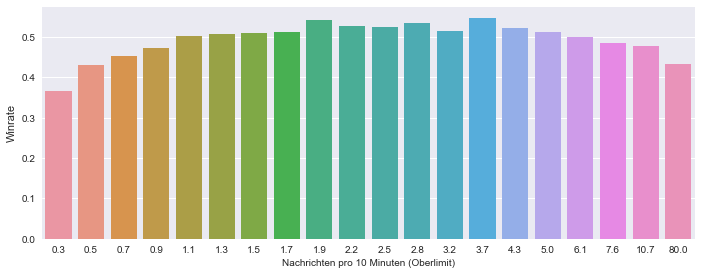

In [86]:
# Erzeuge Barchart
plt.figure(figsize=(11.69,4.27))
sns.barplot(x=groupedquantile.Bereiche, y = groupedquantile.Winrate)
plt.xlabel('Nachrichten pro 10 Minuten (Oberlimit)', fontsize=10)
plt.ylabel('Winrate')

** Interpretation: ** Sowohl wenig als auch zu viel Kommunikation sind schädlich für die Winrate des Teams. Bei einem gesunden Maß an Datenaustausch läuft das Spiel optimal.

### Winrate abhängig von der Anzahl der Zeichenanzahl gesendet pro Minute

In [87]:
# Füge die zuvor erstellten Bereiche zu beiden Datensätzen hinzu
groupedchat_win['BereicheZeichenProMinute'] = pd.cut(groupedchat_win['ZeichenProMinute'] , quantile_zeichen, labels = quantile_zeichen.values[1:])
groupedchat_lose['BereicheZeichenProMinute'] = pd.cut(groupedchat_lose['ZeichenProMinute'] , quantile_zeichen, labels = quantile_zeichen.values[1:])
# Füge beide Datensätze zu einem gruppierten Datensatz zusammen
groupedquantile = pd.DataFrame(groupedchat_win[['BereicheZeichenProMinute', 'Team']].replace({'Team':{'Radiant':0,'Dire':1}}).groupby('BereicheZeichenProMinute').sum())
groupedquantile.columns = ['GewonneneSpiele']
groupedquantile['VerloreneSpiele'] = pd.DataFrame(groupedchat_lose[['BereicheZeichenProMinute', 'Team']].replace({'Team':{'Radiant':0,'Dire':1}}).groupby('BereicheZeichenProMinute').sum())
# Erstelle die Gesamtanzahl an Spielen für jeden Bereich
groupedquantile['GespielteSpiele'] = groupedquantile.GewonneneSpiele + groupedquantile.VerloreneSpiele
# Berechnung der Winrate pro Bereich
groupedquantile['Winrate'] = groupedquantile.GewonneneSpiele/groupedquantile.GespielteSpiele
groupedquantile['Bereiche'] = [round(x*10,1) for x in groupedquantile.index.values]

In [219]:
# Gemeinsamer Datensatz aus beiden getrennten Datensätzen
groupedquantile.reset_index().head().transpose()

,0,1,2,3,4
BereicheZeichenProMinute,0.131617,0.26393,0.417766,0.588928,0.769231
GewonneneSpiele,1043,1130,1144,1149,1144
VerloreneSpiele,1493,1241,1209,1091,1106
GespielteSpiele,2536,2371,2353,2240,2250
Winrate,0.411278,0.476592,0.486188,0.512946,0.508444
Bereiche,1.3,2.6,4.2,5.9,7.7


#### Diagramm

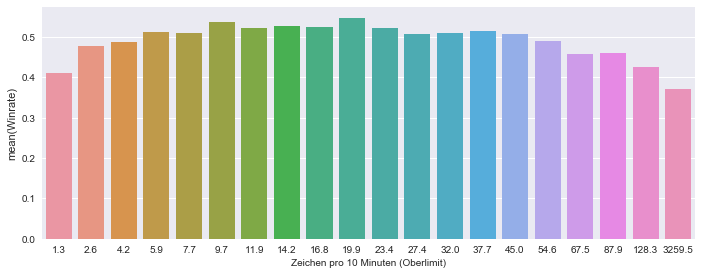

In [89]:
# Erzeuge Barchart
plt.figure(figsize=(11.69,4.27))
sns.barplot(x=groupedquantile.Bereiche, y = groupedquantile.Winrate)
plt.xlabel('Zeichen pro 10 Minuten (Oberlimit)', fontsize=10)

** Interpretation: ** Wie bei der Nachrichten pro Minute Verteilung zeigt sich ein geringer Vorteil in gesunder Kommunikation. Zwischen 4.3 und 54.6 Zeichen pro 10 Minuten, also einfache Befehle und nicht viel Tratsch, geben dem Team einen leichten Vorteil.

## Gewinnchancen in Abhängigkeit von Goldanteil

In [90]:
# Erzeugen von lokalen Dataframes
match = None
match = df_match.copy()
player = df_player.copy()

In [91]:
match["gewinner"] = match.radiant_win.map(lambda x:"radiant" if x else "dire")
match.drop("radiant_win", axis=1, inplace=True)
mat_1 = match.merge(player,on=['match_id'])
# mat_125 = df_match_50000.merge(df_match_50000,on='match_id').merge(df_players[df_players["player_slot"]>6],on='match_id')

In [92]:
mat_1["team"]= mat_1.player_slot.map(lambda x:"radiant" if x<10 else "dire")

#### Aufbereitete Daten

In [222]:
mat_1.head(5).transpose()

,0,1,2,3,4
match_id,0,0,0,0,0
duration,2375,2375,2375,2375,2375
gewinner,radiant,radiant,radiant,radiant,radiant
hero_id,86,51,83,11,67
player_slot,0,1,2,3,4
gold,3261,2954,110,1179,3307
gold_spent,10960,17760,12195,22505,23825
kills,9,13,0,8,20
deaths,3,3,4,4,3
assists,18,18,15,19,17


In [94]:
mat_1["total_gold"] =  mat_1["gold"] + mat_1["gold_spent"]


In [95]:
series = mat_1.groupby(["match_id", "team"]).sum().total_gold

In [96]:
series_total = mat_1.groupby(["match_id"]).sum().total_gold

In [97]:
series_total = series_total.reset_index()
series = series.reset_index()

In [98]:
series_total = series_total.merge(match[["match_id", "gewinner"]], on="match_id")
series_total.head()

,match_id,total_gold,gewinner
0,0,160394,radiant
1,1,190921,dire
2,2,150281,dire
3,3,183524,dire
4,4,134089,radiant


In [99]:
series_total = series_total.merge(series.rename(columns=({"total_gold":"teamgold"})), on="match_id")


In [100]:
series_total['anteil'] = series_total.teamgold/series_total.total_gold*100
series_total.head()

,match_id,total_gold,gewinner,team,teamgold,anteil
0,0,160394,radiant,dire,62338,38.865544
1,0,160394,radiant,radiant,98056,61.134456
2,1,190921,dire,dire,116835,61.195468
3,1,190921,dire,radiant,74086,38.804532
4,2,150281,dire,dire,92797,61.748990


In [101]:
series_total[series_total.gewinner==series_total.team ][series_total.anteil<50].shape

(851, 6)

In [102]:
lower = 40
upper = 20
perc = 1
bins=[x for x in range(lower,100-upper,1)]
print(len(bins))
series_total['bereiche_anteil'] = pd.cut(
    series_total.anteil,
    bins=bins,
    labels=bins[:-1])

40


#### Getrennte Bereiche zur Berechnung

In [223]:
series_total.head(5).transpose()

,0,1,2,3,4
match_id,0,0,1,1,2
total_gold,160394,160394,190921,190921,150281
gewinner,radiant,radiant,dire,dire,dire
team,dire,radiant,dire,radiant,dire
teamgold,62338,98056,116835,74086,92797
anteil,38.8655,61.1345,61.1955,38.8045,61.749
bereiche_anteil,NaN,61,61,NaN,61


#### Verteilung Goldanteile bei Spielende

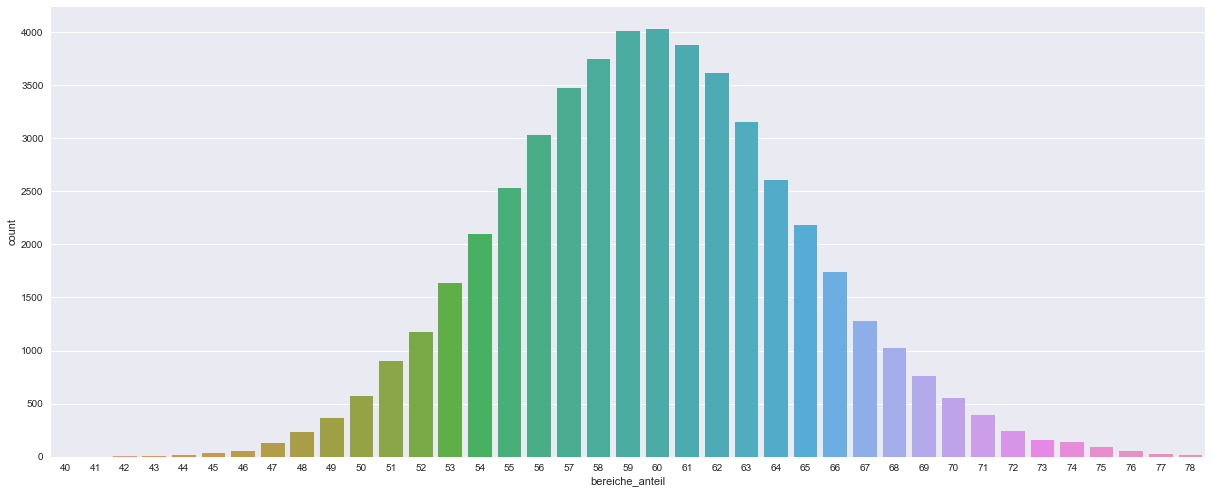

In [104]:
plt.figure(figsize=(20.69,8.27))
sns.countplot(x='bereiche_anteil',data=series_total[series_total.gewinner == series_total.team])

In [105]:
 x = (series_total \
 .bereiche_anteil \
 .value_counts()-series_total[series_total \
 .gewinner != series_total.team] \
 .bereiche_anteil \
 .value_counts())/series_total \
 .bereiche_anteil \
 .value_counts()

#### Gewinnwahrscheinlichkeit abhängig vom Goldvorsprung

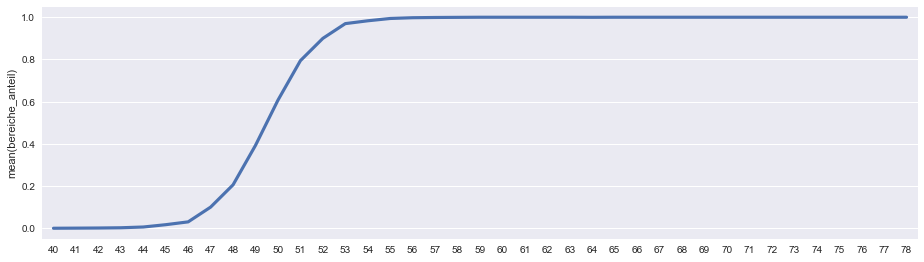

In [229]:
plt.figure(figsize=(15.69,4.27))
sns.pointplot( x=x.index , y=x, markers='', linestyles='-')

In [230]:
series_total.anteil.head()

0    38.865544
1    61.134456
2    61.195468
3    38.804532
4    61.748990
Name: anteil, dtype: float64

In [108]:
stats.linregress(series_total.anteil, series_total.gewinner.map(lambda x: 1 if x=="radiant" else 0 ))

LinregressResult(slope=-4.1436818451406479e-20, intercept=0.51885999999999999, rvalue=-9.5605326533158619e-19, pvalue=0.99999999999999978, stderr=0.00013705934639404965)